In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import style
import matplotlib.pyplot as plt
import random
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from sklearn.model_selection import GridSearchCV
style.use("ggplot")

In [3]:
## reading clean data
data = pd.read_csv('research_joint_data.csv')
data.head()

,Id,StageName,Status_Reason__c,RecordType.Name,Final_Record_Type__c,RICE_Supported__c,CreatedDate,CloseDate,Actual_Close_Date__c,Amount,...,emails,calls,meetings,tasks,events,other,total_contacts,days_till_first_contact,contacts_first_month,contacts_three_month
0,0062e000002Hc2PAAS,Closed Lost,Customer No Longer Interested,Custom Education (MSPACE Included),Custom Education (MSPACE Included),RIC-BD&I,2019-11-07T00:59:46.000Z,31/8/20,30/4/20,100000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0062e000002HFaaAAG,Post Award,NaN,Parent Grant,Parent Grant,RIC-RE&D,2018-09-19T04:32:55.000Z,31/12/49,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0062e000002HFabAAG,Post Award,NaN,Parent Grant,Parent Grant,RIC-RE&D,2018-09-19T04:32:19.000Z,22/6/20,22/6/20,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0062e000002HFacAAG,Closed,NaN,Parent Grant,Parent Grant,NaN,2016-07-06T05:03:00.000Z,31/12/49,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0062e000002HFadAAG,Closed,NaN,Parent Grant,Parent Grant,NaN,2016-07-21T23:56:54.000Z,31/12/49,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,Amount,Estimated_Project_Total_Value__c,Booked_Revenue__c,Actual_Project_Total_Value__c,UoM_Organisation_Level__c,emails,calls,meetings,tasks,events,other,total_contacts,days_till_first_contact,contacts_first_month,contacts_three_month
count,7.365000e+03,4.934000e+03,3.113000e+03,3.173000e+03,0.0,588.000000,588.0,588.0,588.0,588.0,588.0,588.000000,5.880000e+02,588.000000,588.000000
mean,4.166182e+05,1.949387e+07,1.974171e+05,3.649558e+05,NaN,9.525510,0.0,0.0,0.0,0.0,0.0,9.525510,3.401361e+08,4.943878,6.556122
std,2.453104e+06,7.396115e+08,1.273635e+06,3.424244e+06,NaN,20.664622,0.0,0.0,0.0,0.0,0.0,20.664622,5.827149e+09,12.428134,14.904874
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,-2.590000e+02,0.000000,0.000000
25%,0.000000e+00,4.743750e+03,0.000000e+00,0.000000e+00,NaN,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000e+00,0.000000,1.000000
50%,1.782000e+04,6.000000e+04,7.530000e+03,7.500000e+03,NaN,3.000000,0.0,0.0,0.0,0.0,0.0,3.000000,1.000000e+00,1.000000,2.000000
75%,1.500000e+05,3.000000e+05,8.700000e+04,9.000000e+04,NaN,8.000000,0.0,0.0,0.0,0.0,0.0,8.000000,6.975000e+01,4.000000,6.000000
max,8.000000e+07,3.000000e+10,5.130000e+07,1.300000e+08,NaN,218.000000,0.0,0.0,0.0,0.0,0.0,218.000000,1.000000e+11,136.000000,138.000000


In [5]:
len(data.columns)

45

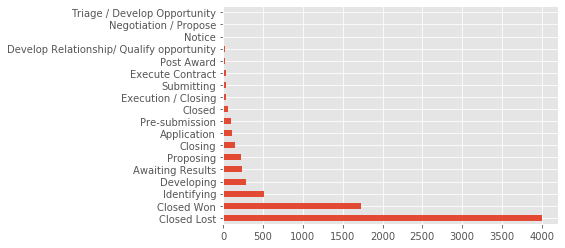

In [25]:
data["StageName"].value_counts(dropna=False).plot(kind="barh")

In [23]:
sum(a[2:])

1858

In [24]:
sum(a[:2])

5739

False